<a href="https://colab.research.google.com/github/2stndard/polars/blob/main/8%EC%9E%A5_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!wget https://www.python.org/ftp/python/3.12.7/Python-3.12.7.tgz
!tar xvfz Python-3.12.7.tgz
!Python-3.12.7/configure
!make
!sudo make install

In [ ]:
!python --version

In [ ]:
!pip list

In [ ]:
!pip install polars==1.15

In [ ]:
## 사전 실행 코드
import polars as pl
df_boxoffice = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/polars/data/movie/KOBIS_기간별박스오피스.csv", skip_rows = 4, try_parse_dates=True)
boxoffice_cols = df_boxoffice.columns
boxoffice_cols[4] = '매출액점유율'
df_boxoffice.columns = [i.replace(' ', '') for i in boxoffice_cols]
df_boxoffice = df_boxoffice.with_columns(
    pl.col('매출액', '누적매출액').str.replace_all(',', '').cast(pl.Int64),
    pl.col('관객수', '누적관객수', '스크린수', '상영횟수').str.replace_all(',', '').cast(pl.Int64)
)
df_boxoffice = df_boxoffice.with_columns(
    pl.col('장르').str.split(','),
    pl.col('배우').str.split(','),
)
df_boxoffice = (df_boxoffice.filter(
    pl.col('순위').is_not_null()).
                filter(~(pl.col('장르').list.contains('성인물(에로)'))).
                filter(pl.col('매출액') != 0).
                filter(~((pl.col('관객수') <= 1) & (pl.col('누적관객수') <= 1) &
                         (pl.col('스크린수') <= 1) & (pl.col('상영횟수') <= 1)))
                )

In [45]:
df_insideout = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/polars/data/movie/KOBIS_일자별_통계정보_인사이드아웃2.csv", skip_rows = 3, try_parse_dates=True)
df_insideout_cols = df_insideout.columns

df_insideout.columns = [i.replace(' ', '') for i in df_insideout_cols]

df_insideout = df_insideout.with_columns(
    pl.col('스크린수', '상영횟수', '좌석수', '매출액', '관객수', '누적매출액', '누적관객수').str.replace_all(',', '').cast(pl.Int64),
    pl.col('스크린점유율', '상영점유율', '좌석점유율', '좌석판매율').str.replace_all('%', '').cast(pl.Float64),
).with_columns(
    pl.col('매출액').diff().alias('매출액변화'),
    pl.col('관객수').diff().alias('관객수변화')
).with_columns(pl.lit('인사이드 아웃 2').alias('영화명'))
## df_insideout.head(10)

df_Executioner = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/polars/data/movie/KOBIS_일자별_통계정보_베테랑2.csv", skip_rows = 3, try_parse_dates=True)
df_Executioner_cols = df_Executioner.columns

df_Executioner.columns = [i.replace(' ', '') for i in df_Executioner_cols]

df_Executioner = df_Executioner.with_columns(
    pl.col('스크린수', '상영횟수', '좌석수', '매출액', '관객수', '누적매출액', '누적관객수').str.replace_all(',', '').cast(pl.Int64),
    pl.col('스크린점유율', '상영점유율', '좌석점유율', '좌석판매율').str.replace_all('%', '').cast(pl.Float64),
).with_columns(
    pl.col('매출액').diff().alias('매출액변화'),
    pl.col('관객수').diff().alias('관객수변화')
).with_columns(pl.lit('베테랑2').alias('영화명'))
## df_Executioner.head(10)

df_Pilot = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/polars/data/movie/KOBIS_일자별_통계정보_파일럿.csv", skip_rows = 3, try_parse_dates=True)
df_Pilot_cols = df_Pilot.columns

df_Pilot.columns = [i.replace(' ', '') for i in df_Pilot_cols]

df_Pilot = df_Pilot.with_columns(
    pl.col('스크린수', '상영횟수', '좌석수', '매출액', '관객수', '누적매출액', '누적관객수').str.replace_all(',', '').cast(pl.Int64),
    pl.col('스크린점유율', '상영점유율', '좌석점유율', '좌석판매율').str.replace_all('%', '').cast(pl.Float64),
).with_columns(
    pl.col('매출액').diff().alias('매출액변화'),
    pl.col('관객수').diff().alias('관객수변화')
).with_columns(pl.lit('파일럿').alias('영화명'))
## df_Pilot.head(10)

df_Wonka = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/polars/data/movie/KOBIS_일자별_통계정보_웡카.csv", skip_rows = 3, try_parse_dates=True)
df_Wonka_cols = df_Wonka.columns

df_Wonka.columns = [i.replace(' ', '') for i in df_Wonka_cols]

df_Wonka = df_Wonka.with_columns(
    pl.col('스크린수', '상영횟수', '좌석수', '매출액', '관객수', '누적매출액', '누적관객수').str.replace_all(',', '').cast(pl.Int64),
    pl.col('스크린점유율', '상영점유율', '좌석점유율', '좌석판매율').str.replace_all('%', '').cast(pl.Float64),
).with_columns(
    pl.col('매출액').diff().alias('매출액변화'),
    pl.col('관객수').diff().alias('관객수변화')
).with_columns(pl.lit('웡카').alias('영화명'))
## df_Wonka.head(10)

df_Moana2 = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/polars/data/movie/KOBIS_일자별_통계정보_모아나2.csv", skip_rows = 3, try_parse_dates=True)
df_Moana2_cols = df_Moana2.columns

df_Moana2.columns = [i.replace(' ', '') for i in df_Moana2_cols]

df_Moana2 = df_Moana2.with_columns(
    pl.col('스크린수', '상영횟수', '좌석수', '매출액', '관객수', '누적매출액', '누적관객수').str.replace_all(',', '').cast(pl.Int64),
    pl.col('스크린점유율', '상영점유율', '좌석점유율', '좌석판매율').str.replace_all('%', '').cast(pl.Float64),
).with_columns(
    pl.col('매출액').diff().alias('매출액변화'),
    pl.col('관객수').diff().alias('관객수변화')
).with_columns(pl.lit('모아나 2').alias('영화명'))
## df_Moana2.head(10)

df_Firefighter = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/polars/data/movie/KOBIS_일자별_통계정보_소방관.csv", skip_rows = 3, try_parse_dates=True)
df_Firefighter_cols = df_Firefighter.columns

df_Firefighter.columns = [i.replace(' ', '') for i in df_Firefighter_cols]

df_Firefighter = df_Firefighter.with_columns(
    pl.col('스크린수', '상영횟수', '좌석수', '매출액', '관객수', '누적매출액', '누적관객수').str.replace_all(',', '').cast(pl.Int64),
    pl.col('스크린점유율', '상영점유율', '좌석점유율', '좌석판매율').str.replace_all('%', '').cast(pl.Float64),
).with_columns(
    pl.col('매출액').diff().alias('매출액변화'),
    pl.col('관객수').diff().alias('관객수변화')
).with_columns(pl.lit('소방관').alias('영화명'))
## df_Firefighter.head(10)

df_Harbin = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/polars/data/movie/KOBIS_일자별_통계정보_하얼빈.csv", skip_rows = 3, try_parse_dates=True)
df_Harbin_cols = df_Harbin.columns

df_Harbin.columns = [i.replace(' ', '') for i in df_Harbin_cols]

df_Harbin = df_Harbin.with_columns(
    pl.col('스크린수', '상영횟수', '좌석수', '매출액', '관객수', '누적매출액', '누적관객수').str.replace_all(',', '').cast(pl.Int64),
    pl.col('스크린점유율', '상영점유율', '좌석점유율', '좌석판매율').str.replace_all('%', '').cast(pl.Float64),
).with_columns(
    pl.col('매출액').diff().alias('매출액변화'),
    pl.col('관객수').diff().alias('관객수변화')
).with_columns(pl.lit('하얼빈').alias('영화명'))
## df_Harbin.head(10)

df_Escape = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/polars/data/movie/KOBIS_일자별_통계정보_탈주.csv", skip_rows = 3, try_parse_dates=True)
df_Escape_cols = df_Escape.columns

df_Escape.columns = [i.replace(' ', '') for i in df_Escape_cols]

df_Escape = df_Escape.with_columns(
    pl.col('스크린수', '상영횟수', '좌석수', '매출액', '관객수', '누적매출액', '누적관객수').str.replace_all(',', '').cast(pl.Int64),
    pl.col('스크린점유율', '상영점유율', '좌석점유율', '좌석판매율').str.replace_all('%', '').cast(pl.Float64),
).with_columns(
    pl.col('매출액').diff().alias('매출액변화'),
    pl.col('관객수').diff().alias('관객수변화')
).with_columns(pl.lit('탈주').alias('영화명'))
## df_Escape.head(10)

In [46]:
df_boxoffice.filter(pl.col('순위') <= 100).select('스크린수').to_series().plot.hist()

alt.Chart(...)

In [47]:
import altair as alt
df_boxoffice.filter(pl.col('순위') <= 100).select('관객수').plot.bar(
    alt.X('관객수', title='관객수').bin(maxbins=30),
    y=alt.Y('count()', title='영화편수')
)

alt.Chart(...)

In [48]:
import plotly.express as px

In [49]:
fig = px.histogram(    ## plotly.express의 히스토그램 함수
    df_boxoffice.filter(pl.col('순위') <= 100),  ## 폴라스 데이터프레임에서 순위 100위 이하 필터링
    x="상영횟수", nbins = 20)  ## x축에 상영횟수 열을 매핑하고 bin의 수를 20개로 설정
fig.show()


In [50]:
fig = px.histogram(    ## plotly.express의 히스토그램 함수
    df_boxoffice.filter(pl.col('순위') <= 100).with_columns(
        pl.col('개봉일').dt.weekday().alias('개봉요일')
    ),  ## 폴라스 데이터프레임에서 개봉일이 없는 데이터 제거하고 개봉요일 열 생성
    ## x축에 개봉요일 열을 매핑하고 bin의 수를 7개로 설정
    x="개봉요일", nbins = 7, text_auto = True)
fig.show()


In [51]:
fig = px.histogram(    ## plotly.express의 히스토그램 함수
    df_boxoffice.filter(pl.col('개봉일').dt.year() == 2024, pl.col('순위') <= 100) \
    .with_columns(
        pl.col('개봉일').dt.month().alias('개봉월')
    ),  ## 폴라스 데이터프레임에서 순위 100위 이하 필터링
    ## x축에 상영횟수 열을 매핑하고 bin의 수를 20개로 설정
    x="개봉월", nbins = 12, color = '대표국적', text_auto = True)
fig.show()

In [52]:
df_boxoffice.filter(
    pl.col('순위') <= 100).select(
    pl.col('매출액'), pl.col('스크린수'), pl.col('대표국적')
).plot.point(x = '스크린수', y = '매출액', color = '대표국적')

alt.Chart(...)

In [53]:
fig = px.scatter(
    df_boxoffice.filter(
    pl.col('순위') <= 100).select(
        pl.col('스크린수'), pl.col('매출액'), pl.col('대표국적')),
    x = '스크린수', y = '매출액', color = '대표국적', trendline = 'lowess')
fig.show()

In [54]:
(df_boxoffice.filter(pl.col('순위') <= 100).
 select(['매출액', '누적매출액', '관객수', '누적관객수', '스크린수', '상영횟수']).
 plot.point(
    x = alt.X(alt.repeat("column"), type='quantitative'),
    y = alt.Y(alt.repeat("row"), type='quantitative')).
 repeat(
    row=['매출액', '스크린수', '누적매출액'],
    column=['관객수', '상영횟수', '누적관객수'])
)

alt.RepeatChart(...)

In [55]:
fig = px.scatter_matrix(df_boxoffice.
                        select(['매출액', '누적매출액', '관객수',
                                '누적관객수', '스크린수', '상영횟수']).to_pandas())
fig.show()

In [56]:
(df_boxoffice.filter(pl.col('순위') <= 100).
 group_by('대표국적').
 agg(pl.col('관객수').mean().alias('평균관객수')).
 plot.bar(
    x = alt.X('대표국적').sort('-y'),
    y = '평균관객수').
 properties(
    width = 300, height = 300)
)

alt.Chart(...)

In [57]:
fig = px.bar(
    (df_boxoffice.filter(pl.col('순위') <= 100).group_by('대표국적')
    .agg((pl.col('매출액').sum() / pl.col('관객수').sum())
         .round(1).alias('객단가')))
    .sort('객단가', descending = True),
    x = '대표국적', y = '객단가',
    color = '대표국적', text = '객단가',
    color_discrete_map = {'한국': 'red', '일본':'gray', '프랑스':'gray',
                          '미국':'gray', '영국':'gray', '호주':'gray',
                          '대만':'gray', '중국':'gray'})
fig.show()


In [58]:
fig = px.bar(
    (df_boxoffice.filter(
        pl.col('순위') <= 100, pl.col('대표국적').is_in(['한국', '미국', '일본'])).
     with_columns(
         pl.when(pl.col('등급') == '15세관람가,15세이상관람가').
            then(pl.lit('15세이상관람가')).
            otherwise(pl.col('등급')).alias('등급')).
     group_by('등급', '대표국적').
     agg(pl.col('관객수') .mean().round(1).alias('관객수'))),
    x = '등급', y = '관객수', facet_col = '대표국적', text = '관객수',
    category_orders = {'대표국적':['한국', '미국', '일본'],
                       '등급':['전체관람가', '12세이상관람가', '15세이상관람가',
                               '청소년관람불가']})
fig.show()

In [59]:
df_exhuma = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/polars/data/movie/KOBIS_일자별_통계정보_파묘.csv",
                        skip_rows = 3, try_parse_dates=True)
df_exhuma_cols = df_exhuma.columns

df_exhuma.columns = [i.replace(' ', '') for i in df_exhuma_cols]

df_exhuma = df_exhuma.with_columns(
    pl.col('스크린수', '상영횟수', '좌석수', '매출액', '관객수', '누적매출액', '누적관객수').
    str.replace_all(',', '').cast(pl.Int64),
    pl.col('스크린점유율', '상영점유율', '좌석점유율', '좌석판매율').
    str.replace_all('%', '').cast(pl.Float64),
).with_columns(
    pl.col('매출액').diff().alias('매출액변화'),
    pl.col('관객수').diff().alias('관객수변화')
).with_columns(pl.lit('파묘').alias('영화명'))


In [60]:
df_roundup = pl.read_csv("/content/drive/MyDrive/Colab Notebooks/polars/data/movie/KOBIS_일자별_통계정보_범죄도시.csv",
                         skip_rows = 3, try_parse_dates=True)
df_roundup_cols = df_roundup.columns

df_roundup.columns = [i.replace(' ', '') for i in df_roundup_cols]

df_roundup = df_roundup.with_columns(
    pl.col('스크린수', '상영횟수', '좌석수', '매출액', '관객수', '누적매출액', '누적관객수').
    str.replace_all(',', '').cast(pl.Int64),
    pl.col('스크린점유율', '상영점유율', '좌석점유율', '좌석판매율').
    str.replace_all('%', '').cast(pl.Float64),
).with_columns(
    pl.col('매출액').diff().alias('매출액변화'),
    pl.col('관객수').diff().alias('관객수변화')
).with_columns(pl.lit('범죄도시4').alias('영화명'))


In [61]:
df_merge = pl.concat([df_exhuma, df_roundup], how = 'vertical')

In [62]:
df_merge.plot.line(x = '날짜', y = '관객수', color = '영화명').properties(width=1500, height=350)

alt.Chart(...)

In [63]:
fig = px.line(df_merge, x = '날짜', y = '누적관객수', color = '영화명')
fig.show()

In [64]:
df_boxoffice.filter(pl.col('순위') <= 100) \
             .with_columns(
                 pl.when(pl.col('등급') == '15세관람가,15세이상관람가') \
                .then(pl.lit('15세이상관람가')) \
                .otherwise(pl.col('등급')) \
                .alias('등급')
            ).plot.boxplot(x = '대표국적', y = '매출액')


alt.Chart(...)

In [65]:
fig = px.box(
    df_boxoffice.filter(pl.col('순위') <= 200).explode('장르').with_columns(
                    (pl.col('관객수')/pl.col('상영횟수')).alias('상영횟수별관객수')),
    x = '장르', y = '상영횟수별관객수', points = 'all', title = '박스오피스 200위의 장르별 상영횟수당 관객수')
fig.show()


In [66]:
df_boxoffice_10 = (pl.concat([df_exhuma.sort('날짜').head(30),
                                 df_roundup.sort('날짜').head(30),
                                 df_insideout.sort('날짜').head(30),
                                 df_Executioner.sort('날짜').head(30),
                                 df_Pilot.sort('날짜').head(30),
                                 df_Wonka.sort('날짜').head(30),
                                 df_Moana2.sort('날짜').head(30),
                                 df_Firefighter.sort('날짜').head(30),
                                 df_Harbin.sort('날짜').head(30),
                                 df_Escape.sort('날짜').head(30)],
                                how = 'vertical').
                      group_by('영화명').
                      agg(pl.col('관객수').alias('30일관객수'))
                     )
df_boxoffice_10

영화명,30일관객수
str,list[i64]
"""탈주""","[6959, 2496, … 34225]"
"""모아나 2""","[848, 196876, … 129280]"
"""하얼빈""","[2865, 6983, … 48910]"
"""소방관""","[214, 2748, … 95845]"
"""파묘""","[5173, 838, … 69871]"
"""베테랑2""","[290, 2474, … 34501]"
"""범죄도시4""","[4185, 2463, … 111645]"
"""파일럿""","[158, 190, … 89240]"
"""인사이드 아웃 2""","[1656, 194831, … 63942]"


In [67]:
df_boxoffice_table = (df_boxoffice.with_columns(
    pl.col('배우').list.head(3),
    pl.when(pl.col('대표국적')=='한국').then(pl.lit('KOR')).
       when(pl.col('대표국적')=='미국').then(pl.lit('USA')).alias('flag'),
    pl.when(pl.col('등급')=='전체관람가').
       then(pl.lit('/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_all.jpg')).
       when(pl.col('등급')=='12세이상관람가').
       then(pl.lit('/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_12.jpg')).
       when(pl.col('등급')=='15세이상관람가').
       then(pl.lit('/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_15.jpg')).
       when(pl.col('등급')=='청소년관람불가').
       then(pl.lit('/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_18.jpg')).
    alias('등급아이콘'),
    (pl.col('매출액')/pl.col('관객수')).round(1).alias('객단가')).
                      select(pl.all().exclude(['국적', '대표국적', '배급사',
                                               '제작사', '누적관객수', '누적매출액',
                                               '매출액점유율'])).
head(10).join(df_boxoffice_10, on = '영화명').sort("순위")
                     )
df_boxoffice_table


순위,영화명,개봉일,매출액,관객수,스크린수,상영횟수,등급,장르,감독,배우,flag,등급아이콘,객단가,30일관객수
i64,str,date,i64,i64,i64,i64,str,list[str],str,list[str],str,str,f64,list[i64]
1,"""파묘""",2024-02-22,115157490414,11914784,2367,364955,"""15세이상관람가""","[""미스터리"", ""공포(호러)""]","""장재현""","[""최민식"", ""김고은"", ""유해진""]","""KOR""","""/content/drive/MyDrive/Colab N…",9665.1,"[5173, 838, … 69871]"
2,"""범죄도시4""",2024-04-24,110050000734,11502779,2980,375434,"""15세이상관람가""","[""액션"", ""범죄""]","""허명행""","[""김무열"", ""박지환"", ""이동휘""]","""KOR""","""/content/drive/MyDrive/Colab N…",9567.3,"[4185, 2463, … 111645]"
3,"""인사이드 아웃 2""",2024-06-12,84509284036,8799013,2619,331341,"""전체관람가""","[""애니메이션""]","""켈시 만""","[""에이미 포엘러"", ""토니 헤일""]","""USA""","""/content/drive/MyDrive/Colab N…",9604.4,"[1656, 194831, … 63942]"
4,"""베테랑2""",2024-09-13,72474035814,7525339,2691,279673,"""15세이상관람가""","[""액션"", ""범죄""]","""류승완""","[""황정민"", ""정해인"", ""장윤주""]","""KOR""","""/content/drive/MyDrive/Colab N…",9630.7,"[290, 2474, … 34501]"
5,"""파일럿""",2024-07-31,43204079201,4718036,1956,203283,"""12세이상관람가""","[""코미디""]","""김한결""","[""조정석"", ""이주명"", ""한선화""]","""KOR""","""/content/drive/MyDrive/Colab N…",9157.2,"[158, 190, … 89240]"
6,"""웡카""",2024-01-31,33958821189,3531717,1753,152290,"""전체관람가""","[""판타지"", ""드라마""]","""폴 킹""","[""티모시 샬라메"", ""칼라 레인"", ""올리비아 콜맨""]","""USA""","""/content/drive/MyDrive/Colab N…",9615.4,"[544, 423, … 110612]"
7,"""모아나 2""",2024-11-27,31120328070,3373139,1985,126584,"""전체관람가""","[""애니메이션""]","""데이브 데릭 주니어""","[""아우이 크라발호"", ""드웨인 존슨""]","""USA""","""/content/drive/MyDrive/Colab N…",9225.9,"[848, 196876, … 129280]"
8,"""소방관""",2024-12-04,31161634690,3317319,1594,119780,"""12세이상관람가""","[""드라마""]","""곽경택""","[""권영민"", ""주원"", ""곽도원""]","""KOR""","""/content/drive/MyDrive/Colab N…",9393.6,"[214, 2748, … 95845]"
9,"""하얼빈""",2024-12-24,26249320820,2755265,2125,72494,"""15세이상관람가""","[""드라마""]","""우민호""","[""이창근"", ""신우철"", ""현빈""]","""KOR""","""/content/drive/MyDrive/Colab N…",9527.0,"[2865, 6983, … 48910]"


In [ ]:
!pip install great_tables

In [68]:
from great_tables import GT, md, html, loc, style
gt_boxoffice = GT(df_boxoffice_table.head(10) , locale = 'ko')
gt_boxoffice


순위,영화명,개봉일,매출액,관객수,스크린수,상영횟수,등급,장르,감독,배우,flag,등급아이콘,객단가,30일관객수
1,파묘,2024-02-22,115157490414,11914784,2367,364955,15세이상관람가,"['미스터리', '공포(호러)']",장재현,"['최민식', '김고은', '유해진']",KOR,/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_15.jpg,9665.1,"[5173, 838, 330118, 374492, 770974, 819842, 328445, 298464, 384594, 384294, 851600, 832278, 652059, 207996, 190540, 174674, 160362, 243235, 559672, 472287, 135262, 121933, 113406, 105065, 150668, 344954, 285277, 82399, 71978, 69871]"
2,범죄도시4,2024-04-24,110050000734,11502779,2980,375434,15세이상관람가,"['액션', '범죄']",허명행,"['김무열', '박지환', '이동휘']",KOR,/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_15.jpg,9567.3,"[4185, 2463, 2947, 4172, 3510, 5598, 5378, 9150, 3049, 821466, 473054, 651172, 1219038, 1048321, 362002, 389867, 784775, 250557, 380639, 689896, 851693, 606796, 148747, 124517, 117161, 161651, 328231, 287421, 87129, 111645]"
3,인사이드 아웃 2,2024-06-12,84509284036,8799013,2619,331341,전체관람가,['애니메이션'],켈시 만,"['에이미 포엘러', '토니 헤일']",USA,/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_all.jpg,9604.4,"[1656, 194831, 135763, 242059, 777041, 731319, 139876, 130699, 143105, 140314, 214873, 669250, 593565, 120345, 104897, 184815, 100720, 164568, 436598, 412539, 82143, 83386, 105687, 101449, 183570, 390084, 332687, 56312, 63615, 63942]"
4,베테랑2,2024-09-13,72474035814,7525339,2691,279673,15세이상관람가,"['액션', '범죄']",류승완,"['황정민', '정해인', '장윤주']",KOR,/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_15.jpg,9630.7,"[290, 2474, 4043, 11689, 497498, 755086, 824702, 764681, 854175, 738619, 233283, 218067, 386734, 309695, 99916, 88771, 132449, 75957, 93990, 171298, 148391, 77575, 114342, 59901, 110330, 64215, 87719, 74173, 28304, 34501]"
5,파일럿,2024-07-31,43204079201,4718036,1956,203283,12세이상관람가,['코미디'],김한결,"['조정석', '이주명', '한선화']",KOR,/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_12.jpg,9157.2,"[158, 190, 3642, 2172, 1990, 1396, 104, 1313, 13391, 1854, 2274, 1821, 12033, 6701, 2085, 320, 373859, 223746, 249189, 441577, 404673, 157828, 144970, 131424, 127355, 147241, 307553, 268428, 93481, 89240]"
6,웡카,2024-01-31,33958821189,3531717,1753,152290,전체관람가,"['판타지', '드라마']",폴 킹,"['티모시 샬라메', '칼라 레인', '올리비아 콜맨']",USA,/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_all.jpg,9615.4,"[544, 423, 295, 256, 179783, 78687, 92026, 226091, 208615, 64984, 62799, 55709, 92735, 152517, 149632, 220022, 228306, 73325, 78003, 63586, 81594, 185916, 175171, 59263, 57938, 58643, 44325, 56046, 112772, 110612]"
7,모아나 2,2024-11-27,31120328070,3373139,1985,126584,전체관람가,['애니메이션'],데이브 데릭 주니어,"['아우이 크라발호', '드웨인 존슨']",USA,/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_all.jpg,9225.9,"[848, 196876, 99638, 143828, 490096, 437075, 61789, 59422, 55981, 49224, 83346, 275074, 251924, 35269, 37586, 40292, 38168, 64229, 167887, 157331, 25370, 31569, 24672, 22666, 33256, 82698, 82292, 18592, 26594, 129280]"
8,소방관,2024-12-04,31161634690,3317319,1594,119780,12세이상관람가,['드라마'],곽경택,"['권영민', '주원', '곽도원']",KOR,/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_12.jpg,9393.6,"[214, 2748, 4011, 380, 3524, 81673, 82308, 112028, 218562, 238689, 89397, 86228, 96379, 91615, 138829, 259958, 258325, 80049, 79511, 81225, 80114, 105969, 210311, 194686, 65499, 81132, 193329, 46520, 48682, 95845]"
9,하얼빈,2024-12-24,26249320820,2755265,2125,72494,15세이상관람가,['드라마'],우민호,"['이창근', '신우철', '현빈']",KOR,/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_15.jpg,9527.0,"[2865, 6983, 6564, 3125, 3300, 1844, 381527, 847792, 227461, 196105, 376363, 331381, 157539, 212397, 340489, 92862, 91398, 218543, 173974, 56648, 48910]"
10,탈주,2024-07-03,24239796596,2561872,1234,121035,12세이상관람가,['액션'],이종필,"['이제훈', '구교환', '홍사빈']",KOR,/content/drive/MyDrive/Colab Notebooks/polars/data/icon/rating_12.jpg,9461.8,"[6959, 2496, 3367, 255, 260, 306, 260, 112667, 80960, 110013, 222064, 197022, 69083, 65096, 66612, 57662, 60050, 147099, 142179, 46999, 46164, 50064, 49240, 79796, 153656, 138843, 48624, 468

In [69]:
## style 네임스페이스를 사용한 tab_header()
style_boxoffice = df_boxoffice_table.head(10).style.tab_header(title = '2024년 박스오피스 Top 10',
subtitle = md('2024년 상영 영화 중 가장 천만관객 영화는 <strong>"파묘"</strong>, <strong>"범죄도시4"</strong>였고, 미국영화 중 가장 흥행작은 **인사이드아웃2**였다.'))
style_boxoffice

GT(_tbl_data=shape: (10, 15)
┌──────┬──────────────┬────────────┬──────────────┬───┬──────┬──────────────┬────────┬─────────────┐
│ 순위 ┆ 영화명       ┆ 개봉일     ┆ 매출액       ┆ … ┆ flag ┆ 등급아이콘   ┆ 객단가 ┆ 30일관객수  │
│ ---  ┆ ---          ┆ ---        ┆ ---          ┆   ┆ ---  ┆ ---          ┆ ---    ┆ ---         │
│ i64  ┆ str          ┆ date       ┆ i64          ┆   ┆ str  ┆ str          ┆ f64    ┆ list[i64]   │
╞══════╪══════════════╪════════════╪══════════════╪═══╪══════╪══════════════╪════════╪═════════════╡
│ 1    ┆ 파묘         ┆ 2024-02-22 ┆ 115157490414 ┆ … ┆ KOR  ┆ /content/dri ┆ 9665.1 ┆ [5173, 838, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 69871]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 2    ┆ 범죄도시4    ┆ 2024-04-24 ┆ 110050000734 ┆ … ┆ KOR  ┆ /content/dri ┆ 9567.3 ┆ [4185,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2463, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 111645]     │
│ 3    ┆ 인사이드     ┆ 2024-06-12 ┆ 84509284036  ┆ … ┆ USA  ┆ /content/dri ┆ 9604.4 ┆ [1656,      │
│      ┆ 아웃 2       ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 194831, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 63942]      │
│ 4    ┆ 베테랑2      ┆ 2024-09-13 ┆ 72474035814  ┆ … ┆ KOR  ┆ /content/dri ┆ 9630.7 ┆ [290, 2474, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 34501]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 5    ┆ 파일럿       ┆ 2024-07-31 ┆ 43204079201  ┆ … ┆ KOR  ┆ /content/dri ┆ 9157.2 ┆ [158, 190,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 89240]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 6    ┆ 웡카         ┆ 2024-01-31 ┆ 33958821189  ┆ … ┆ USA  ┆ /content/dri ┆ 9615.4 ┆ [544, 423,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 110612]   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 7    ┆ 모아나 2     ┆ 2024-11-27 ┆ 31120328070  ┆ … ┆ USA  ┆ /content/dri ┆ 9225.9 ┆ [848,       │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 196876, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 129280]     │
│ 8    ┆ 소방관       ┆ 2024-12-04 ┆ 31161634690  ┆ … ┆ KOR  ┆ /content/dri ┆ 9393.6 ┆ [214, 2748, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 95845]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 9    ┆ 하얼빈       ┆ 2024-12-24 ┆ 26249320820  ┆ … ┆ KOR  ┆ /content/dri ┆ 9527.0 ┆ [2865,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 6983, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 48910]      │
│ 10   ┆ 탈주         ┆ 2024-07-03 ┆ 24239796596  ┆ … ┆ KOR  ┆ /content/dri ┆ 9461.8 ┆ [6959,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2496, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 34225]      │
└──────┴──────────────┴────────────┴──────────────┴───┴──────┴──────────────┴────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x7b1bc6172390>, _boxhead=Boxhead([ColInfo(var='순위', type=<ColInfoTypeEnum.default: 1>, column_label='순위', column_align='right', column_width=None), ColInfo(var='영화명', type=<ColInfoTypeEnum.default: 1>, column_label='영화명', column_align='left', column_width=None), ColInfo(var='개봉일', type=<ColInfoTypeEnum.default: 1>, column_label='개봉일', column

In [ ]:
## GT를 사용한 tab_header()
style_boxoffice = gt_boxoffice.tab_header(title = '2024년 박스오피스 Top 10',
subtitle = md('2024년 상영 영화 중 가장 천만관객 영화는 <strong>"파묘"</strong>, <strong>"범죄도시4"</strong>였고, 미국영화 중 가장 흥행작은 **인사이드아웃2**였다.'))
gt_boxoffice


In [70]:
## style 네임스페이스를 사용
style_boxoffice = (style_boxoffice.tab_stub(rowname_col = '순위', groupname_col = '등급').
                                           tab_stubhead('순위'))
style_boxoffice


GT(_tbl_data=shape: (10, 15)
┌──────┬──────────────┬────────────┬──────────────┬───┬──────┬──────────────┬────────┬─────────────┐
│ 순위 ┆ 영화명       ┆ 개봉일     ┆ 매출액       ┆ … ┆ flag ┆ 등급아이콘   ┆ 객단가 ┆ 30일관객수  │
│ ---  ┆ ---          ┆ ---        ┆ ---          ┆   ┆ ---  ┆ ---          ┆ ---    ┆ ---         │
│ i64  ┆ str          ┆ date       ┆ i64          ┆   ┆ str  ┆ str          ┆ f64    ┆ list[i64]   │
╞══════╪══════════════╪════════════╪══════════════╪═══╪══════╪══════════════╪════════╪═════════════╡
│ 1    ┆ 파묘         ┆ 2024-02-22 ┆ 115157490414 ┆ … ┆ KOR  ┆ /content/dri ┆ 9665.1 ┆ [5173, 838, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 69871]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 2    ┆ 범죄도시4    ┆ 2024-04-24 ┆ 110050000734 ┆ … ┆ KOR  ┆ /content/dri ┆ 9567.3 ┆ [4185,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2463, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 111645]     │
│ 3    ┆ 인사이드     ┆ 2024-06-12 ┆ 84509284036  ┆ … ┆ USA  ┆ /content/dri ┆ 9604.4 ┆ [1656,      │
│      ┆ 아웃 2       ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 194831, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 63942]      │
│ 4    ┆ 베테랑2      ┆ 2024-09-13 ┆ 72474035814  ┆ … ┆ KOR  ┆ /content/dri ┆ 9630.7 ┆ [290, 2474, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 34501]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 5    ┆ 파일럿       ┆ 2024-07-31 ┆ 43204079201  ┆ … ┆ KOR  ┆ /content/dri ┆ 9157.2 ┆ [158, 190,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 89240]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 6    ┆ 웡카         ┆ 2024-01-31 ┆ 33958821189  ┆ … ┆ USA  ┆ /content/dri ┆ 9615.4 ┆ [544, 423,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 110612]   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 7    ┆ 모아나 2     ┆ 2024-11-27 ┆ 31120328070  ┆ … ┆ USA  ┆ /content/dri ┆ 9225.9 ┆ [848,       │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 196876, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 129280]     │
│ 8    ┆ 소방관       ┆ 2024-12-04 ┆ 31161634690  ┆ … ┆ KOR  ┆ /content/dri ┆ 9393.6 ┆ [214, 2748, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 95845]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 9    ┆ 하얼빈       ┆ 2024-12-24 ┆ 26249320820  ┆ … ┆ KOR  ┆ /content/dri ┆ 9527.0 ┆ [2865,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 6983, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 48910]      │
│ 10   ┆ 탈주         ┆ 2024-07-03 ┆ 24239796596  ┆ … ┆ KOR  ┆ /content/dri ┆ 9461.8 ┆ [6959,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2496, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 34225]      │
└──────┴──────────────┴────────────┴──────────────┴───┴──────┴──────────────┴────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x7b1bc6172390>, _boxhead=Boxhead([ColInfo(var='순위', type=<ColInfoTypeEnum.stub: 2>, column_label='순위', column_align='right', column_width=None), ColInfo(var='영화명', type=<ColInfoTypeEnum.default: 1>, column_label='영화명', column_align='left', column_width=None), ColInfo(var='개봉일', type=<ColInfoTypeEnum.default: 1>, column_label='개봉일', column_al

In [71]:
## style 네임스페이스를 사용
style_boxoffice = (style_boxoffice.
                   cols_label(배우='대표배우').
                   cols_label(flag='국가').
                   cols_move(['감독', '배우', '장르'], '영화명').
                   cols_move('flag', '상영횟수').
                   cols_move_to_start('등급아이콘').
                   cols_align(align="center").
                   cols_width(cases={"영화명": "80px", "감독": "75px"}).
                   tab_spanner('영화정보', ['감독', '배우', '장르', '개봉일']).
                   tab_spanner('매출정보', ['매출액', '객단가']).
                   tab_spanner('관객정보', ['관객수']).
                   tab_spanner('상영정보', ['스크린수', '상영횟수'])
                   )
style_boxoffice


GT(_tbl_data=shape: (10, 15)
┌──────┬──────────────┬────────────┬──────────────┬───┬──────┬──────────────┬────────┬─────────────┐
│ 순위 ┆ 영화명       ┆ 개봉일     ┆ 매출액       ┆ … ┆ flag ┆ 등급아이콘   ┆ 객단가 ┆ 30일관객수  │
│ ---  ┆ ---          ┆ ---        ┆ ---          ┆   ┆ ---  ┆ ---          ┆ ---    ┆ ---         │
│ i64  ┆ str          ┆ date       ┆ i64          ┆   ┆ str  ┆ str          ┆ f64    ┆ list[i64]   │
╞══════╪══════════════╪════════════╪══════════════╪═══╪══════╪══════════════╪════════╪═════════════╡
│ 1    ┆ 파묘         ┆ 2024-02-22 ┆ 115157490414 ┆ … ┆ KOR  ┆ /content/dri ┆ 9665.1 ┆ [5173, 838, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 69871]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 2    ┆ 범죄도시4    ┆ 2024-04-24 ┆ 110050000734 ┆ … ┆ KOR  ┆ /content/dri ┆ 9567.3 ┆ [4185,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2463, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 111645]     │
│ 3    ┆ 인사이드     ┆ 2024-06-12 ┆ 84509284036  ┆ … ┆ USA  ┆ /content/dri ┆ 9604.4 ┆ [1656,      │
│      ┆ 아웃 2       ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 194831, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 63942]      │
│ 4    ┆ 베테랑2      ┆ 2024-09-13 ┆ 72474035814  ┆ … ┆ KOR  ┆ /content/dri ┆ 9630.7 ┆ [290, 2474, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 34501]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 5    ┆ 파일럿       ┆ 2024-07-31 ┆ 43204079201  ┆ … ┆ KOR  ┆ /content/dri ┆ 9157.2 ┆ [158, 190,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 89240]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 6    ┆ 웡카         ┆ 2024-01-31 ┆ 33958821189  ┆ … ┆ USA  ┆ /content/dri ┆ 9615.4 ┆ [544, 423,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 110612]   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 7    ┆ 모아나 2     ┆ 2024-11-27 ┆ 31120328070  ┆ … ┆ USA  ┆ /content/dri ┆ 9225.9 ┆ [848,       │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 196876, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 129280]     │
│ 8    ┆ 소방관       ┆ 2024-12-04 ┆ 31161634690  ┆ … ┆ KOR  ┆ /content/dri ┆ 9393.6 ┆ [214, 2748, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 95845]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 9    ┆ 하얼빈       ┆ 2024-12-24 ┆ 26249320820  ┆ … ┆ KOR  ┆ /content/dri ┆ 9527.0 ┆ [2865,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 6983, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 48910]      │
│ 10   ┆ 탈주         ┆ 2024-07-03 ┆ 24239796596  ┆ … ┆ KOR  ┆ /content/dri ┆ 9461.8 ┆ [6959,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2496, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 34225]      │
└──────┴──────────────┴────────────┴──────────────┴───┴──────┴──────────────┴────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x7b1bc6172390>, _boxhead=Boxhead([ColInfo(var='등급아이콘', type=<ColInfoTypeEnum.default: 1>, column_label='등급아이콘', column_align='center', column_width=None), ColInfo(var='순위', type=<ColInfoTypeEnum.stub: 2>, column_label='순위', column_align='center', column_width=None), ColInfo(var='영화명', type=<ColInfoTypeEnum.default: 1>, column_label='영화명', co

In [72]:
## style 네임스페이스를 사용
style_boxoffice = (style_boxoffice.
                   fmt_currency(columns = ['매출액', '객단가'], currency = 'KRW').
                   fmt_integer(columns = ['관객수', '스크린수', '상영횟수']).
                   fmt_date(columns = '개봉일', date_style = 'wday_month_day_year',
                            locale = 'ko')
                  )
style_boxoffice


GT(_tbl_data=shape: (10, 15)
┌──────┬──────────────┬────────────┬──────────────┬───┬──────┬──────────────┬────────┬─────────────┐
│ 순위 ┆ 영화명       ┆ 개봉일     ┆ 매출액       ┆ … ┆ flag ┆ 등급아이콘   ┆ 객단가 ┆ 30일관객수  │
│ ---  ┆ ---          ┆ ---        ┆ ---          ┆   ┆ ---  ┆ ---          ┆ ---    ┆ ---         │
│ i64  ┆ str          ┆ date       ┆ i64          ┆   ┆ str  ┆ str          ┆ f64    ┆ list[i64]   │
╞══════╪══════════════╪════════════╪══════════════╪═══╪══════╪══════════════╪════════╪═════════════╡
│ 1    ┆ 파묘         ┆ 2024-02-22 ┆ 115157490414 ┆ … ┆ KOR  ┆ /content/dri ┆ 9665.1 ┆ [5173, 838, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 69871]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 2    ┆ 범죄도시4    ┆ 2024-04-24 ┆ 110050000734 ┆ … ┆ KOR  ┆ /content/dri ┆ 9567.3 ┆ [4185,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2463, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 111645]     │
│ 3    ┆ 인사이드     ┆ 2024-06-12 ┆ 84509284036  ┆ … ┆ USA  ┆ /content/dri ┆ 9604.4 ┆ [1656,      │
│      ┆ 아웃 2       ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 194831, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 63942]      │
│ 4    ┆ 베테랑2      ┆ 2024-09-13 ┆ 72474035814  ┆ … ┆ KOR  ┆ /content/dri ┆ 9630.7 ┆ [290, 2474, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 34501]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 5    ┆ 파일럿       ┆ 2024-07-31 ┆ 43204079201  ┆ … ┆ KOR  ┆ /content/dri ┆ 9157.2 ┆ [158, 190,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 89240]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 6    ┆ 웡카         ┆ 2024-01-31 ┆ 33958821189  ┆ … ┆ USA  ┆ /content/dri ┆ 9615.4 ┆ [544, 423,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 110612]   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 7    ┆ 모아나 2     ┆ 2024-11-27 ┆ 31120328070  ┆ … ┆ USA  ┆ /content/dri ┆ 9225.9 ┆ [848,       │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 196876, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 129280]     │
│ 8    ┆ 소방관       ┆ 2024-12-04 ┆ 31161634690  ┆ … ┆ KOR  ┆ /content/dri ┆ 9393.6 ┆ [214, 2748, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 95845]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 9    ┆ 하얼빈       ┆ 2024-12-24 ┆ 26249320820  ┆ … ┆ KOR  ┆ /content/dri ┆ 9527.0 ┆ [2865,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 6983, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 48910]      │
│ 10   ┆ 탈주         ┆ 2024-07-03 ┆ 24239796596  ┆ … ┆ KOR  ┆ /content/dri ┆ 9461.8 ┆ [6959,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2496, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 34225]      │
└──────┴──────────────┴────────────┴──────────────┴───┴──────┴──────────────┴────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x7b1bc6172390>, _boxhead=Boxhead([ColInfo(var='등급아이콘', type=<ColInfoTypeEnum.default: 1>, column_label='등급아이콘', column_align='center', column_width=None), ColInfo(var='순위', type=<ColInfoTypeEnum.stub: 2>, column_label='순위', column_align='center', column_width=None), ColInfo(var='영화명', type=<ColInfoTypeEnum.default: 1>, column_label='영화명', co

GT(_tbl_data=shape: (10, 15)
┌──────┬──────────────┬────────────┬──────────────┬───┬──────┬──────────────┬────────┬─────────────┐
│ 순위 ┆ 영화명       ┆ 개봉일     ┆ 매출액       ┆ … ┆ flag ┆ 등급아이콘   ┆ 객단가 ┆ 30일관객수  │
│ ---  ┆ ---          ┆ ---        ┆ ---          ┆   ┆ ---  ┆ ---          ┆ ---    ┆ ---         │
│ i64  ┆ str          ┆ date       ┆ i64          ┆   ┆ str  ┆ str          ┆ f64    ┆ list[i64]   │
╞══════╪══════════════╪════════════╪══════════════╪═══╪══════╪══════════════╪════════╪═════════════╡
│ 1    ┆ 파묘         ┆ 2024-02-22 ┆ 115157490414 ┆ … ┆ KOR  ┆ /content/dri ┆ 9665.1 ┆ [5173, 838, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 69871]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 2    ┆ 범죄도시4    ┆ 2024-04-24 ┆ 110050000734 ┆ … ┆ KOR  ┆ /content/dri ┆ 9567.3 ┆ [4185,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2463, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 111645]     │
│ 3    ┆ 인사이드     ┆ 2024-06-12 ┆ 84509284036  ┆ … ┆ USA  ┆ /content/dri ┆ 9604.4 ┆ [1656,      │
│      ┆ 아웃 2       ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 194831, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 63942]      │
│ 4    ┆ 베테랑2      ┆ 2024-09-13 ┆ 72474035814  ┆ … ┆ KOR  ┆ /content/dri ┆ 9630.7 ┆ [290, 2474, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 34501]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 5    ┆ 파일럿       ┆ 2024-07-31 ┆ 43204079201  ┆ … ┆ KOR  ┆ /content/dri ┆ 9157.2 ┆ [158, 190,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 89240]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 6    ┆ 웡카         ┆ 2024-01-31 ┆ 33958821189  ┆ … ┆ USA  ┆ /content/dri ┆ 9615.4 ┆ [544, 423,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 110612]   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 7    ┆ 모아나 2     ┆ 2024-11-27 ┆ 31120328070  ┆ … ┆ USA  ┆ /content/dri ┆ 9225.9 ┆ [848,       │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 196876, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 129280]     │
│ 8    ┆ 소방관       ┆ 2024-12-04 ┆ 31161634690  ┆ … ┆ KOR  ┆ /content/dri ┆ 9393.6 ┆ [214, 2748, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 95845]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 9    ┆ 하얼빈       ┆ 2024-12-24 ┆ 26249320820  ┆ … ┆ KOR  ┆ /content/dri ┆ 9527.0 ┆ [2865,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 6983, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 48910]      │
│ 10   ┆ 탈주         ┆ 2024-07-03 ┆ 24239796596  ┆ … ┆ KOR  ┆ /content/dri ┆ 9461.8 ┆ [6959,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2496, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 34225]      │
└──────┴──────────────┴────────────┴──────────────┴───┴──────┴──────────────┴────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x7b1bc6172390>, _boxhead=Boxhead([ColInfo(var='등급아이콘', type=<ColInfoTypeEnum.default: 1>, column_label='등급아이콘', column_align='center', column_width=None), ColInfo(var='순위', type=<ColInfoTypeEnum.stub: 2>, column_label='순위', column_align='center', column_width=None), ColInfo(var='영화명', type=<ColInfoTypeEnum.default: 1>, column_label='영화명', co
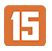
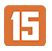
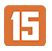
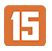
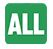
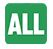
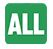
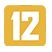
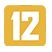
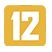

In [73]:
## style 네임스페이스를 사용
style_boxoffice = style_boxoffice.fmt_flag(columns="flag").fmt_image(columns='등급아이콘')
style_boxoffice

GT(_tbl_data=shape: (10, 15)
┌──────┬──────────────┬────────────┬──────────────┬───┬──────┬──────────────┬────────┬─────────────┐
│ 순위 ┆ 영화명       ┆ 개봉일     ┆ 매출액       ┆ … ┆ flag ┆ 등급아이콘   ┆ 객단가 ┆ 30일관객수  │
│ ---  ┆ ---          ┆ ---        ┆ ---          ┆   ┆ ---  ┆ ---          ┆ ---    ┆ ---         │
│ i64  ┆ str          ┆ date       ┆ i64          ┆   ┆ str  ┆ str          ┆ f64    ┆ list[i64]   │
╞══════╪══════════════╪════════════╪══════════════╪═══╪══════╪══════════════╪════════╪═════════════╡
│ 1    ┆ 파묘         ┆ 2024-02-22 ┆ 115157490414 ┆ … ┆ KOR  ┆ /content/dri ┆ 9665.1 ┆ [5173, 838, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 69871]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 2    ┆ 범죄도시4    ┆ 2024-04-24 ┆ 110050000734 ┆ … ┆ KOR  ┆ /content/dri ┆ 9567.3 ┆ [4185,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2463, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 111645]     │
│ 3    ┆ 인사이드     ┆ 2024-06-12 ┆ 84509284036  ┆ … ┆ USA  ┆ /content/dri ┆ 9604.4 ┆ [1656,      │
│      ┆ 아웃 2       ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 194831, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 63942]      │
│ 4    ┆ 베테랑2      ┆ 2024-09-13 ┆ 72474035814  ┆ … ┆ KOR  ┆ /content/dri ┆ 9630.7 ┆ [290, 2474, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 34501]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 5    ┆ 파일럿       ┆ 2024-07-31 ┆ 43204079201  ┆ … ┆ KOR  ┆ /content/dri ┆ 9157.2 ┆ [158, 190,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 89240]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 6    ┆ 웡카         ┆ 2024-01-31 ┆ 33958821189  ┆ … ┆ USA  ┆ /content/dri ┆ 9615.4 ┆ [544, 423,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 110612]   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 7    ┆ 모아나 2     ┆ 2024-11-27 ┆ 31120328070  ┆ … ┆ USA  ┆ /content/dri ┆ 9225.9 ┆ [848,       │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 196876, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 129280]     │
│ 8    ┆ 소방관       ┆ 2024-12-04 ┆ 31161634690  ┆ … ┆ KOR  ┆ /content/dri ┆ 9393.6 ┆ [214, 2748, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 95845]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 9    ┆ 하얼빈       ┆ 2024-12-24 ┆ 26249320820  ┆ … ┆ KOR  ┆ /content/dri ┆ 9527.0 ┆ [2865,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 6983, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 48910]      │
│ 10   ┆ 탈주         ┆ 2024-07-03 ┆ 24239796596  ┆ … ┆ KOR  ┆ /content/dri ┆ 9461.8 ┆ [6959,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2496, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 34225]      │
└──────┴──────────────┴────────────┴──────────────┴───┴──────┴──────────────┴────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x7b1bc6172390>, _boxhead=Boxhead([ColInfo(var='등급아이콘', type=<ColInfoTypeEnum.default: 1>, column_label='등급아이콘', column_align='center', column_width=None), ColInfo(var='순위', type=<ColInfoTypeEnum.stub: 2>, column_label='순위', column_align='center', column_width=None), ColInfo(var='영화명', type=<ColInfoTypeEnum.default: 1>, column_label='영화명', co
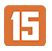
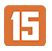
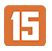
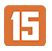
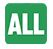
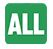
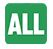
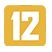
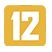
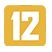

In [74]:
## style 네임스페이스를 사용
style_boxoffice = style_boxoffice.fmt_nanoplot(columns="30일관객수", reference_line="mean")
style_boxoffice

GT(_tbl_data=shape: (10, 15)
┌──────┬──────────────┬────────────┬──────────────┬───┬──────┬──────────────┬────────┬─────────────┐
│ 순위 ┆ 영화명       ┆ 개봉일     ┆ 매출액       ┆ … ┆ flag ┆ 등급아이콘   ┆ 객단가 ┆ 30일관객수  │
│ ---  ┆ ---          ┆ ---        ┆ ---          ┆   ┆ ---  ┆ ---          ┆ ---    ┆ ---         │
│ i64  ┆ str          ┆ date       ┆ i64          ┆   ┆ str  ┆ str          ┆ f64    ┆ list[i64]   │
╞══════╪══════════════╪════════════╪══════════════╪═══╪══════╪══════════════╪════════╪═════════════╡
│ 1    ┆ 파묘         ┆ 2024-02-22 ┆ 115157490414 ┆ … ┆ KOR  ┆ /content/dri ┆ 9665.1 ┆ [5173, 838, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 69871]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 2    ┆ 범죄도시4    ┆ 2024-04-24 ┆ 110050000734 ┆ … ┆ KOR  ┆ /content/dri ┆ 9567.3 ┆ [4185,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2463, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 111645]     │
│ 3    ┆ 인사이드     ┆ 2024-06-12 ┆ 84509284036  ┆ … ┆ USA  ┆ /content/dri ┆ 9604.4 ┆ [1656,      │
│      ┆ 아웃 2       ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 194831, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 63942]      │
│ 4    ┆ 베테랑2      ┆ 2024-09-13 ┆ 72474035814  ┆ … ┆ KOR  ┆ /content/dri ┆ 9630.7 ┆ [290, 2474, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 34501]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 5    ┆ 파일럿       ┆ 2024-07-31 ┆ 43204079201  ┆ … ┆ KOR  ┆ /content/dri ┆ 9157.2 ┆ [158, 190,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 89240]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 6    ┆ 웡카         ┆ 2024-01-31 ┆ 33958821189  ┆ … ┆ USA  ┆ /content/dri ┆ 9615.4 ┆ [544, 423,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 110612]   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 7    ┆ 모아나 2     ┆ 2024-11-27 ┆ 31120328070  ┆ … ┆ USA  ┆ /content/dri ┆ 9225.9 ┆ [848,       │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 196876, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 129280]     │
│ 8    ┆ 소방관       ┆ 2024-12-04 ┆ 31161634690  ┆ … ┆ KOR  ┆ /content/dri ┆ 9393.6 ┆ [214, 2748, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 95845]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 9    ┆ 하얼빈       ┆ 2024-12-24 ┆ 26249320820  ┆ … ┆ KOR  ┆ /content/dri ┆ 9527.0 ┆ [2865,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 6983, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 48910]      │
│ 10   ┆ 탈주         ┆ 2024-07-03 ┆ 24239796596  ┆ … ┆ KOR  ┆ /content/dri ┆ 9461.8 ┆ [6959,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2496, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 34225]      │
└──────┴──────────────┴────────────┴──────────────┴───┴──────┴──────────────┴────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x7b1bc6172390>, _boxhead=Boxhead([ColInfo(var='등급아이콘', type=<ColInfoTypeEnum.default: 1>, column_label='등급아이콘', column_align='center', column_width=None), ColInfo(var='순위', type=<ColInfoTypeEnum.stub: 2>, column_label='순위', column_align='center', column_width=None), ColInfo(var='영화명', type=<ColInfoTypeEnum.default: 1>, column_label='영화명', co
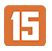
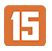
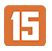
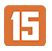
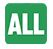
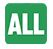
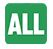
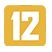
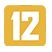
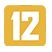

In [75]:
style_boxoffice = (style_boxoffice.tab_style(
    style=style.text(weight = 'bold'),
    locations=loc.body(columns='영화명')).
                   tab_style(
                       style=style.text(color = 'blue'),
                       locations=loc.body(columns='영화명',
                                          rows = [0, 1])).
                   tab_style(
                       style=style.text(weight = 'bold',
                                        size = 'xx-large'),
                       locations=loc.title())
                  )
style_boxoffice

GT(_tbl_data=shape: (10, 15)
┌──────┬──────────────┬────────────┬──────────────┬───┬──────┬──────────────┬────────┬─────────────┐
│ 순위 ┆ 영화명       ┆ 개봉일     ┆ 매출액       ┆ … ┆ flag ┆ 등급아이콘   ┆ 객단가 ┆ 30일관객수  │
│ ---  ┆ ---          ┆ ---        ┆ ---          ┆   ┆ ---  ┆ ---          ┆ ---    ┆ ---         │
│ i64  ┆ str          ┆ date       ┆ i64          ┆   ┆ str  ┆ str          ┆ f64    ┆ list[i64]   │
╞══════╪══════════════╪════════════╪══════════════╪═══╪══════╪══════════════╪════════╪═════════════╡
│ 1    ┆ 파묘         ┆ 2024-02-22 ┆ 115157490414 ┆ … ┆ KOR  ┆ /content/dri ┆ 9665.1 ┆ [5173, 838, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 69871]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 2    ┆ 범죄도시4    ┆ 2024-04-24 ┆ 110050000734 ┆ … ┆ KOR  ┆ /content/dri ┆ 9567.3 ┆ [4185,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2463, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 111645]     │
│ 3    ┆ 인사이드     ┆ 2024-06-12 ┆ 84509284036  ┆ … ┆ USA  ┆ /content/dri ┆ 9604.4 ┆ [1656,      │
│      ┆ 아웃 2       ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 194831, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 63942]      │
│ 4    ┆ 베테랑2      ┆ 2024-09-13 ┆ 72474035814  ┆ … ┆ KOR  ┆ /content/dri ┆ 9630.7 ┆ [290, 2474, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 34501]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 5    ┆ 파일럿       ┆ 2024-07-31 ┆ 43204079201  ┆ … ┆ KOR  ┆ /content/dri ┆ 9157.2 ┆ [158, 190,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 89240]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 6    ┆ 웡카         ┆ 2024-01-31 ┆ 33958821189  ┆ … ┆ USA  ┆ /content/dri ┆ 9615.4 ┆ [544, 423,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 110612]   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 7    ┆ 모아나 2     ┆ 2024-11-27 ┆ 31120328070  ┆ … ┆ USA  ┆ /content/dri ┆ 9225.9 ┆ [848,       │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 196876, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 129280]     │
│ 8    ┆ 소방관       ┆ 2024-12-04 ┆ 31161634690  ┆ … ┆ KOR  ┆ /content/dri ┆ 9393.6 ┆ [214, 2748, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 95845]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 9    ┆ 하얼빈       ┆ 2024-12-24 ┆ 26249320820  ┆ … ┆ KOR  ┆ /content/dri ┆ 9527.0 ┆ [2865,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 6983, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 48910]      │
│ 10   ┆ 탈주         ┆ 2024-07-03 ┆ 24239796596  ┆ … ┆ KOR  ┆ /content/dri ┆ 9461.8 ┆ [6959,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2496, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 34225]      │
└──────┴──────────────┴────────────┴──────────────┴───┴──────┴──────────────┴────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x7b1bc6172390>, _boxhead=Boxhead([ColInfo(var='등급아이콘', type=<ColInfoTypeEnum.default: 1>, column_label='등급아이콘', column_align='center', column_width=None), ColInfo(var='순위', type=<ColInfoTypeEnum.stub: 2>, column_label='순위', column_align='center', column_width=None), ColInfo(var='영화명', type=<ColInfoTypeEnum.default: 1>, column_label='영화명', co
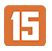
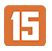
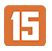
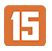
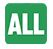
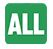
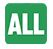
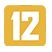
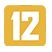
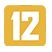

In [76]:
style_boxoffice = (style_boxoffice.tab_style(
    style=style.text(color=pl.when(pl.col("관객수") > 5_000_000).
                              then(pl.lit("red")).\
                              otherwise(pl.lit("lightgray"))),
    locations=loc.body(columns="관객수")).
                   tab_style(
                       style=style.text(weight = 'bold'),
                       locations=loc.body(rows=pl.col("관객수") == pl.col("관객수").max())).
                   tab_style(
                       style=style.fill(color=pl.when(pl.col("객단가") > pl.col('객단가').mean()).
                                                 then(pl.lit("yellow")).
                                                 otherwise(pl.lit("lightgray"))
                                        ),
                       locations=loc.body(columns="객단가")).
                   tab_style(
                       style=style.borders(color='blue', weight="3px"),
                       locations=loc.body(columns="매출액",
                                          rows = pl.col("매출액") > pl.col('매출액').mean())
                       )
                   )
style_boxoffice

GT(_tbl_data=shape: (10, 15)
┌──────┬──────────────┬────────────┬──────────────┬───┬──────┬──────────────┬────────┬─────────────┐
│ 순위 ┆ 영화명       ┆ 개봉일     ┆ 매출액       ┆ … ┆ flag ┆ 등급아이콘   ┆ 객단가 ┆ 30일관객수  │
│ ---  ┆ ---          ┆ ---        ┆ ---          ┆   ┆ ---  ┆ ---          ┆ ---    ┆ ---         │
│ i64  ┆ str          ┆ date       ┆ i64          ┆   ┆ str  ┆ str          ┆ f64    ┆ list[i64]   │
╞══════╪══════════════╪════════════╪══════════════╪═══╪══════╪══════════════╪════════╪═════════════╡
│ 1    ┆ 파묘         ┆ 2024-02-22 ┆ 115157490414 ┆ … ┆ KOR  ┆ /content/dri ┆ 9665.1 ┆ [5173, 838, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 69871]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 2    ┆ 범죄도시4    ┆ 2024-04-24 ┆ 110050000734 ┆ … ┆ KOR  ┆ /content/dri ┆ 9567.3 ┆ [4185,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2463, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 111645]     │
│ 3    ┆ 인사이드     ┆ 2024-06-12 ┆ 84509284036  ┆ … ┆ USA  ┆ /content/dri ┆ 9604.4 ┆ [1656,      │
│      ┆ 아웃 2       ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 194831, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 63942]      │
│ 4    ┆ 베테랑2      ┆ 2024-09-13 ┆ 72474035814  ┆ … ┆ KOR  ┆ /content/dri ┆ 9630.7 ┆ [290, 2474, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 34501]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 5    ┆ 파일럿       ┆ 2024-07-31 ┆ 43204079201  ┆ … ┆ KOR  ┆ /content/dri ┆ 9157.2 ┆ [158, 190,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 89240]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 6    ┆ 웡카         ┆ 2024-01-31 ┆ 33958821189  ┆ … ┆ USA  ┆ /content/dri ┆ 9615.4 ┆ [544, 423,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 110612]   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 7    ┆ 모아나 2     ┆ 2024-11-27 ┆ 31120328070  ┆ … ┆ USA  ┆ /content/dri ┆ 9225.9 ┆ [848,       │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 196876, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 129280]     │
│ 8    ┆ 소방관       ┆ 2024-12-04 ┆ 31161634690  ┆ … ┆ KOR  ┆ /content/dri ┆ 9393.6 ┆ [214, 2748, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 95845]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 9    ┆ 하얼빈       ┆ 2024-12-24 ┆ 26249320820  ┆ … ┆ KOR  ┆ /content/dri ┆ 9527.0 ┆ [2865,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 6983, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 48910]      │
│ 10   ┆ 탈주         ┆ 2024-07-03 ┆ 24239796596  ┆ … ┆ KOR  ┆ /content/dri ┆ 9461.8 ┆ [6959,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2496, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 34225]      │
└──────┴──────────────┴────────────┴──────────────┴───┴──────┴──────────────┴────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x7b1bc6172390>, _boxhead=Boxhead([ColInfo(var='등급아이콘', type=<ColInfoTypeEnum.default: 1>, column_label='등급아이콘', column_align='center', column_width=None), ColInfo(var='순위', type=<ColInfoTypeEnum.stub: 2>, column_label='순위', column_align='center', column_width=None), ColInfo(var='영화명', type=<ColInfoTypeEnum.default: 1>, column_label='영화명', co
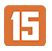
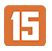
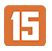
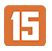
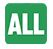
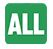
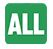
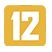
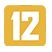
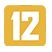

In [77]:
style_boxoffice = style_boxoffice.data_color(columns='스크린수', palette = 'Greens',
                                             domain = [1000, 3000])
style_boxoffice

GT(_tbl_data=shape: (10, 15)
┌──────┬──────────────┬────────────┬──────────────┬───┬──────┬──────────────┬────────┬─────────────┐
│ 순위 ┆ 영화명       ┆ 개봉일     ┆ 매출액       ┆ … ┆ flag ┆ 등급아이콘   ┆ 객단가 ┆ 30일관객수  │
│ ---  ┆ ---          ┆ ---        ┆ ---          ┆   ┆ ---  ┆ ---          ┆ ---    ┆ ---         │
│ i64  ┆ str          ┆ date       ┆ i64          ┆   ┆ str  ┆ str          ┆ f64    ┆ list[i64]   │
╞══════╪══════════════╪════════════╪══════════════╪═══╪══════╪══════════════╪════════╪═════════════╡
│ 1    ┆ 파묘         ┆ 2024-02-22 ┆ 115157490414 ┆ … ┆ KOR  ┆ /content/dri ┆ 9665.1 ┆ [5173, 838, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 69871]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 2    ┆ 범죄도시4    ┆ 2024-04-24 ┆ 110050000734 ┆ … ┆ KOR  ┆ /content/dri ┆ 9567.3 ┆ [4185,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2463, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 111645]     │
│ 3    ┆ 인사이드     ┆ 2024-06-12 ┆ 84509284036  ┆ … ┆ USA  ┆ /content/dri ┆ 9604.4 ┆ [1656,      │
│      ┆ 아웃 2       ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 194831, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 63942]      │
│ 4    ┆ 베테랑2      ┆ 2024-09-13 ┆ 72474035814  ┆ … ┆ KOR  ┆ /content/dri ┆ 9630.7 ┆ [290, 2474, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 34501]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 5    ┆ 파일럿       ┆ 2024-07-31 ┆ 43204079201  ┆ … ┆ KOR  ┆ /content/dri ┆ 9157.2 ┆ [158, 190,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 89240]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 6    ┆ 웡카         ┆ 2024-01-31 ┆ 33958821189  ┆ … ┆ USA  ┆ /content/dri ┆ 9615.4 ┆ [544, 423,  │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 110612]   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 7    ┆ 모아나 2     ┆ 2024-11-27 ┆ 31120328070  ┆ … ┆ USA  ┆ /content/dri ┆ 9225.9 ┆ [848,       │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 196876, …   │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 129280]     │
│ 8    ┆ 소방관       ┆ 2024-12-04 ┆ 31161634690  ┆ … ┆ KOR  ┆ /content/dri ┆ 9393.6 ┆ [214, 2748, │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ … 95845]    │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆             │
│ 9    ┆ 하얼빈       ┆ 2024-12-24 ┆ 26249320820  ┆ … ┆ KOR  ┆ /content/dri ┆ 9527.0 ┆ [2865,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 6983, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 48910]      │
│ 10   ┆ 탈주         ┆ 2024-07-03 ┆ 24239796596  ┆ … ┆ KOR  ┆ /content/dri ┆ 9461.8 ┆ [6959,      │
│      ┆              ┆            ┆              ┆   ┆      ┆ ve/MyDrive/C ┆        ┆ 2496, …     │
│      ┆              ┆            ┆              ┆   ┆      ┆ olab N…      ┆        ┆ 34225]      │
└──────┴──────────────┴────────────┴──────────────┴───┴──────┴──────────────┴────────┴─────────────┘, _body=<great_tables._gt_data.Body object at 0x7b1bc6172390>, _boxhead=Boxhead([ColInfo(var='등급아이콘', type=<ColInfoTypeEnum.default: 1>, column_label='등급아이콘', column_align='center', column_width=None), ColInfo(var='순위', type=<ColInfoTypeEnum.stub: 2>, column_label='순위', column_align='center', column_width=None), ColInfo(var='영화명', type=<ColInfoTypeEnum.default: 1>, column_label='영화명', co
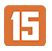
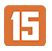
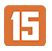
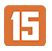
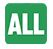
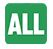
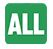
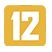
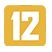
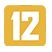

In [78]:
style_boxoffice = (style_boxoffice.tab_source_note(
    source_note=html('출처: <img src="/content/drive/MyDrive/Colab Notebooks/polars/data/icon/logo_comm.png">(https://www.kobis.or.kr/)')).
                   tab_style(style = style.text(align = "right", weight="bold"),
                             locations = loc.source_notes())
                  )
style_boxoffice
